In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Basic Utility Libraries

In [8]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math
import statistics as stats
import scipy
import seaborn

In [9]:
train_df = pd.read_csv("/content/drive/MyDrive/Amazon ML/dataset/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Amazon ML/dataset/test.csv")
sample_submission_df = pd.read_csv("/content/drive/MyDrive/Amazon ML/dataset/sample_submission.csv")
train_df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [ ]:
print("Dimensions: ", train_df.shape)
num_row = train_df.shape[0]
num_col = train_df.shape[1]
print(train_df.dtypes)

Dimensions:  (2249698, 6)
PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object


In [ ]:
data = train_df.copy()

In [ ]:
test_data = test_df.copy()

In [ ]:
data.isna().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [ ]:
test_data.isna().sum()

PRODUCT_ID              0
TITLE                   5
BULLET_POINTS      275922
DESCRIPTION        380001
PRODUCT_TYPE_ID         0
dtype: int64

### Filling Missing (NaN) Values

In [ ]:
data.fillna("", inplace = True)

In [ ]:
test_data.fillna("", inplace = True)

In [ ]:
data.isna().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [ ]:
test_data.isna().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
dtype: int64

In [ ]:
data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000


In [ ]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,,,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",,,6318


In [ ]:
len(test_data)

734736

### Removing Duplicates

In [ ]:
dataset = data.loc[~data.duplicated(subset = ["TITLE","BULLET_POINTS","DESCRIPTION"])]

In [ ]:
len(dataset)

2217443

In [ ]:
dataset.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,,,6112,598.424000


## Implemeting One Hot Encoding

In [ ]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

# Here are the categorical features we are going to create one-hot encoded features for
categorical_features = ['PRODUCT_TYPE_ID'] 

encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
one_hot_features = encoder.fit_transform(dataset[categorical_features])
one_hot_names = encoder.get_feature_names_out()

print("Type of one_hot_columns is:",type(one_hot_features))

Type of one_hot_columns is: <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
one_hot_test_features = encoder.fit_transform(test_data[categorical_features])
one_hot_test_names = encoder.get_feature_names_out()

In [ ]:
one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_features)
one_hot_df.columns = one_hot_names # Now we can see the actual meaning of the one-hot feature in the DataFrame
one_hot_df.head()

,PRODUCT_TYPE_ID_0,PRODUCT_TYPE_ID_1,PRODUCT_TYPE_ID_2,PRODUCT_TYPE_ID_3,PRODUCT_TYPE_ID_4,PRODUCT_TYPE_ID_5,PRODUCT_TYPE_ID_6,PRODUCT_TYPE_ID_7,PRODUCT_TYPE_ID_8,PRODUCT_TYPE_ID_9,...,PRODUCT_TYPE_ID_13411,PRODUCT_TYPE_ID_13412,PRODUCT_TYPE_ID_13413,PRODUCT_TYPE_ID_13414,PRODUCT_TYPE_ID_13415,PRODUCT_TYPE_ID_13416,PRODUCT_TYPE_ID_13417,PRODUCT_TYPE_ID_13418,PRODUCT_TYPE_ID_13419,PRODUCT_TYPE_ID_13420
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_test_df = pd.DataFrame.sparse.from_spmatrix(one_hot_test_features)
one_hot_test_df.columns = one_hot_test_names # Now we can see the actual meaning of the one-hot feature in the DataFrame
one_hot_test_df.head()

,PRODUCT_TYPE_ID_0,PRODUCT_TYPE_ID_1,PRODUCT_TYPE_ID_2,PRODUCT_TYPE_ID_3,PRODUCT_TYPE_ID_4,PRODUCT_TYPE_ID_5,PRODUCT_TYPE_ID_6,PRODUCT_TYPE_ID_7,PRODUCT_TYPE_ID_8,PRODUCT_TYPE_ID_9,...,PRODUCT_TYPE_ID_13408,PRODUCT_TYPE_ID_13410,PRODUCT_TYPE_ID_13411,PRODUCT_TYPE_ID_13413,PRODUCT_TYPE_ID_13414,PRODUCT_TYPE_ID_13415,PRODUCT_TYPE_ID_13416,PRODUCT_TYPE_ID_13417,PRODUCT_TYPE_ID_13419,PRODUCT_TYPE_ID_13420
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transform the following columns by taking log(1+x)
transform_cols = ["PRODUCT_ID","PRODUCT_LENGTH"]
dataset = dataset.copy()
for col in transform_cols:
    col_log1p = col + '_log1p'
    dataset.loc[:, col_log1p] = dataset.loc[:,col].apply(math.log1p)

In [ ]:
# Transform the following columns by taking log(1+x)
transform_cols = ["PRODUCT_ID"]
test_data = test_data.copy()
for col in transform_cols:
    col_log1p = col + '_log1p'
    test_data.loc[:, col_log1p] = test_data.loc[:,col].apply(math.log1p)

In [ ]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_ID_log1p
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,,,6142,13.311948
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,14.363507
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,14.442491
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,13.917681
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",,,6318,13.344313


<ipython-input-29-9c1377734002>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['PRODUCT_LENGTH_log1p']).set_title("Distribution of log(1 + PRODUCT_LENGTH)");


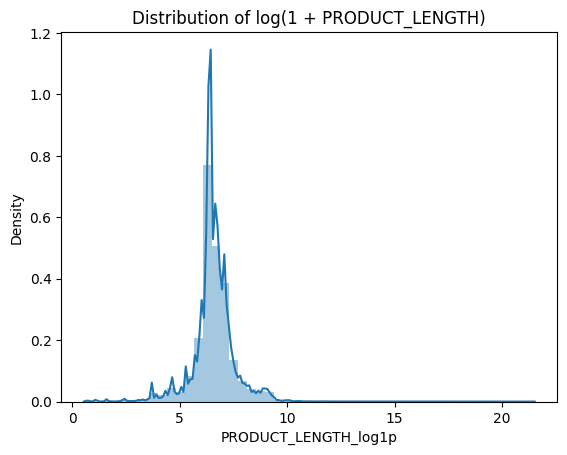

In [ ]:
sns.distplot(dataset['PRODUCT_LENGTH_log1p']).set_title("Distribution of log(1 + PRODUCT_LENGTH)");

In [ ]:
dataset["PRODUCT_ID_log1p"].shape[0], one_hot_features.shape[0]

(2217443, 2217443)

## Combining Numerical & One Hot Features

In [ ]:
from sklearn.model_selection import train_test_split

numerical_feature_names = ["PRODUCT_ID_log1p"]
numerical_features = dataset[numerical_feature_names]
scaler = preprocessing.MinMaxScaler()
numerical_features = scaler.fit_transform(numerical_features) # Need to scale numerical features for ridge regression

# Combine numerical features with one-hot-encoded features
features = scipy.sparse.hstack((numerical_features, one_hot_features),format='csr') 
all_feature_names = np.hstack((numerical_feature_names,one_hot_names)) # Store names of all features for later interpretation

target_column = ['PRODUCT_LENGTH_log1p'] # We will fit log(1 + price) 
target = dataset[target_column].values

# Perform train and test split of data
rand_seed = 42 # For other models we will use the same random seed, so that we're always using the same train-test split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=rand_seed)

In [ ]:
combined = pd.concat([dataset, test_data], axis=0)
combined_one_hot_features = encoder.fit_transform(combined[categorical_features])
combined_one_hot_names = encoder.get_feature_names_out()
combined_one_hot_df = pd.DataFrame.sparse.from_spmatrix(combined_one_hot_features)
combined_one_hot_df.columns = combined_one_hot_names # Now we can see the actual meaning of the one-hot feature in the DataFrame
combined_one_hot_df.head()

,PRODUCT_TYPE_ID_0,PRODUCT_TYPE_ID_1,PRODUCT_TYPE_ID_2,PRODUCT_TYPE_ID_3,PRODUCT_TYPE_ID_4,PRODUCT_TYPE_ID_5,PRODUCT_TYPE_ID_6,PRODUCT_TYPE_ID_7,PRODUCT_TYPE_ID_8,PRODUCT_TYPE_ID_9,...,PRODUCT_TYPE_ID_13411,PRODUCT_TYPE_ID_13412,PRODUCT_TYPE_ID_13413,PRODUCT_TYPE_ID_13414,PRODUCT_TYPE_ID_13415,PRODUCT_TYPE_ID_13416,PRODUCT_TYPE_ID_13417,PRODUCT_TYPE_ID_13418,PRODUCT_TYPE_ID_13419,PRODUCT_TYPE_ID_13420
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
combined.fillna("",inplace = True)

In [ ]:
num_train = len(dataset)
one_hot_train = combined_one_hot_features[:num_train]
one_hot_test = combined_one_hot_features[num_train:]

In [ ]:
combined[:num_train].isna().sum()

PRODUCT_ID              0
TITLE                   0
BULLET_POINTS           0
DESCRIPTION             0
PRODUCT_TYPE_ID         0
PRODUCT_LENGTH          0
PRODUCT_ID_log1p        0
PRODUCT_LENGTH_log1p    0
dtype: int64

In [ ]:
target_train = combined["PRODUCT_LENGTH_log1p"][:num_train]
target_test = combined["PRODUCT_LENGTH_log1p"][num_train:]

In [ ]:
numerical_features = numerical_features.reshape(2217443,1)

In [ ]:
test_numerical_features = test_numerical_features.reshape(734736,1)

## Importing NLTK Tools For NLP (TF-IDF Vectorization)

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

### Preprocessing Text Data (Lowercase Conversion + Punctuation Removal + Lemmatization)

In [ ]:
import string

def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

dataset["TEXT"] = dataset["TITLE"].apply(preprocess_text) + " " + dataset["DESCRIPTION"].apply(preprocess_text) + " " + dataset["BULLET_POINTS"].apply(preprocess_text)
test_data["TEXT"] = test_data["TITLE"].apply(preprocess_text) + " " + test_data["DESCRIPTION"].apply(preprocess_text) + " " + test_data["BULLET_POINTS"].apply(preprocess_text)

In [ ]:
dataset.drop(["TITLE","DESCRIPTION","BULLET_POINTS"], axis = 1, inplace = True)
test_data.drop(["TITLE","DESCRIPTION","BULLET_POINTS"], axis = 1, inplace = True)
dataset.to_csv("drive/MyDrive/Amazon ML/preprocessed/train.csv")
test_data.to_csv("drive/MyDrive/Amazon ML/preprocessed/test.csv")

In [1]:
import pandas as pd
dataset = pd.read_csv("drive/MyDrive/Amazon ML/preprocessed/train.csv")
test_data = pd.read_csv("drive/MyDrive/Amazon ML/preprocessed/test.csv")

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
training_corpus = dataset["TEXT"].values
test_corpus = test_data["TEXT"].values
vectorizer = TfidfVectorizer(stop_words = 'english') 
word_features_train = vectorizer.fit_transform(training_corpus)
word_features_test = vectorizer.transform(test_corpus)
joblib.dump(word_features_train, "drive/MyDrive/Amazon ML/word_features_train.joblib")
joblib.dump(word_features_test, "drive/MyDrive/Amazon ML/word_features_test.joblib")

['drive/MyDrive/AmazonML/word_features_test.joblib']

In [7]:
numerical_features = joblib.load("drive/MyDrive/Amazon ML/numerical_features.joblib")
test_numerical_features = joblib.load("drive/MyDrive/Amazon ML/numerical_test_features.joblib")
one_hot_train = joblib.load("drive/MyDrive/Amazon ML/one_hot_train.joblib")
one_hot_test = joblib.load("drive/MyDrive/Amazon ML/one_hot_test.joblib")

In [8]:
# features_train = np.hstack((numerical_features, one_hot_train))
features_train = scipy.sparse.hstack((numerical_features, one_hot_train, word_features_train),format='csr') 
# features_test = np.hstack((test_numerical_features, one_hot_test))
features_test = scipy.sparse.hstack((test_numerical_features, one_hot_test, word_features_test),format='csr') 

### Saving Features Using Joblib To Avoid Loss Due To Runtime Disconnection

In [10]:
import joblib
joblib.dump(features_train, "drive/MyDrive/Amazon ML/features_train.joblib")
joblib.dump(features_test, "drive/MyDrive/Amazon ML/features_test.joblib")
# joblib.dump(target_train, "drive/MyDrive/AmazonML/target_train.joblib")

['drive/MyDrive/AmazonML/features_test.joblib']

In [1]:
import joblib
import pandas as pd
import numpy as np

features_train = joblib.load("drive/MyDrive/Amazon ML/features_train.joblib")
features_test = joblib.load("drive/MyDrive/Amazon ML/features_test.joblib")
target_train = joblib.load("drive/MyDrive/Amazon ML/target_train.joblib")

## Training Various Regression Models

### 1. Ridge Regression (Best Output)

In [42]:
%%time
from sklearn.linear_model import Ridge
ridge_fit = Ridge(alpha = 1.0, random_state = 42)
# ridge_fit = linear_model.RidgeCV(cv = 5)
ridge_fit.fit(features_train, target_train)
# print("RidgeCV found an optimal regularization parameter alpha =",ridge_fit.alpha_)
import joblib
joblib.dump(ridge_fit, "ridge_fit_full.h5")
# # # test_score_no_text = ridge_fit.score(features_test,target_test)
# # # print("Test score for Ridge Regression without text features:", test_score_no_text)

CPU times: user 30min 10s, sys: 9min 56s, total: 40min 7s
Wall time: 28min 44s


['ridge_fit_full.h5']

### 2. SGD (Stochastic Gradient Descent) Regression

In [21]:
# %%time
# import joblib
# from sklearn.linear_model import SGDRegressor
# sgd = SGDRegressor(max_iter = 15000,
#                    validation_fraction = 0.2,
#                    random_state = 42,
#                    verbose = 2)

# sgd.fit(features_train, target_train);
# joblib.dump(sgd, "sgd_full.h5")

-- Epoch 1
Norm: 10.97, NNZs: 3989659, Bias: 0.236315, T: 2217443, Avg. loss: 0.433139
Total training time: 3.40 seconds.
-- Epoch 2
Norm: 12.66, NNZs: 3989659, Bias: 0.322522, T: 4434886, Avg. loss: 0.393749
Total training time: 8.18 seconds.
-- Epoch 3
Norm: 13.73, NNZs: 3989659, Bias: 0.392522, T: 6652329, Avg. loss: 0.382309
Total training time: 10.89 seconds.
-- Epoch 4
Norm: 14.52, NNZs: 3989659, Bias: 0.453752, T: 8869772, Avg. loss: 0.375468
Total training time: 15.28 seconds.
-- Epoch 5
Norm: 15.16, NNZs: 3989659, Bias: 0.509659, T: 11087215, Avg. loss: 0.370611
Total training time: 18.06 seconds.
-- Epoch 6
Norm: 15.69, NNZs: 3989659, Bias: 0.561291, T: 13304658, Avg. loss: 0.366834
Total training time: 20.43 seconds.
-- Epoch 7
Norm: 16.14, NNZs: 3989659, Bias: 0.609716, T: 15522101, Avg. loss: 0.363774
Total training time: 22.82 seconds.
-- Epoch 8
Norm: 16.54, NNZs: 3989659, Bias: 0.655727, T: 17739544, Avg. loss: 0.361193
Total training time: 25.26 seconds.
-- Epoch 9
Nor

['sgd_full.h5']

### 3. Random Forest Regression

In [5]:
# %%time
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV

# rf_grid = {"n_estimators": np.arange(10, 100, 10),
#            "max_depth": [3, 5, 10],
#            "min_samples_split": np.arange(2, 20, 2),
#            "min_samples_leaf": np.arange(1, 20, 2),
#            "max_features": [0.5, 1, "sqrt"]}

# # Instantiate Model

# rs_model = RandomizedSearchCV(RandomForestRegressor(),
#                               param_distributions = rf_grid,
#                               n_iter = 5, # 100 iters takes 2 hours and gives better results
#                               cv = 5,
#                               verbose = 2)

# # Fit Model

# rs_model.fit(features_train, target_train);
# import joblib
# joblib.dump(rs_model, "random_forest_full.h5")
# # test_score_no_text = rs_model.score(features_test,target_test)
# # print("Test score for RandomForest without text features:", test_score_no_text)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=50; total time=  43.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=50; total time=  42.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=50; total time=  48.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=50; total time=  44.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=50; total time=  44.0s
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=30; total time=11.4min
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=30; total time=10.4min
[CV] END max_depth=3, max_features=0.5, min_samples_leaf=15, min_samples_split=18, n_estimators=30; total t

['random_forest_full.h5']

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error
# score = max( 0 , 100 * ( 1 - mean_absolute_percentage_error( target_test, ridge_fit.predict(features_test))))
# score

## Making Predictions Using Ridge Regression Model

In [43]:
preds = ridge_fit.predict(features_test)

In [47]:
preds = np.expm1(preds)

In [48]:
sample_submission_df["PRODUCT_LENGTH"] = preds

In [49]:
sample_submission_df.head()

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,642.700650
1,1729783,6297.427115
2,1871949,941.933695
3,1107571,61.202666
4,624253,817.448360


## Making Submission File

In [50]:
sample_submission_df.to_csv("drive/MyDrive/Amazon ML/submission.csv", index = False)